In [104]:
import os
import dill
import itertools
import functools
import regex
import glob
import copy
from pathlib import Path

import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
sns.set()

# import tensorflow as tf
# from tensorflow import keras

%matplotlib inline

In [105]:
PATH = Path("E:\Intel Python HackFury 2\data\GUR")

In [106]:
files = glob.glob(os.path.join(PATH.as_posix(), "*_0100.txt"))  # radioso
basic_radiation = []
for f in files:

    frame = pd.read_csv(f, delimiter='\t', infer_datetime_format=True, parse_dates=[0,])
    basic_radiation.append(frame)
basic_radiation = pd.concat(basic_radiation)

In [107]:
basic_radiation.index = np.arange(len(basic_radiation))

In [108]:
basic_radiation

Date/Time  Latitude  Longitude  \
0      2015-01-01 00:01:00    28.425     77.156   
1      2015-01-01 00:02:00    28.425     77.156   
2      2015-01-01 00:03:00    28.425     77.156   
3      2015-01-01 00:04:00    28.425     77.156   
4      2015-01-01 00:05:00    28.425     77.156   
...                    ...       ...        ...   
918724 2018-12-31 23:55:00    28.425     77.156   
918725 2018-12-31 23:56:00    28.425     77.156   
918726 2018-12-31 23:57:00    28.425     77.156   
918727 2018-12-31 23:58:00    28.425     77.156   
918728 2018-12-31 23:59:00    28.425     77.156   

        Short-wave downward (GLOBAL) radiation [W/m**2]  \
0                                                   0.0   
1                                                   0.0   
2                                                   0.0   
3                                                   0.0   
4                                                   0.0   
...                                                 ...   
918724                                              0.0   
918725                                              0.0   
918726                                              0.0   
918727                                              0.0   
918728                                              0.0   

        Direct radiation [W/m**2]  Diffuse radiation [W/m**2]  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
918724                        0.0                         0.0   
918725                        0.0                         0.0   
918726                        0.0                         0.0   
918727                        0.0                         0.0   
918728                        0.0                         0.0   

        Long-wave downward radiation [W/m**2]  Air temperature [deg C]  \
0                                       359.0                      8.8   
1                                       359.0                      8.8   
2                                       360.0                      8.7   
3                                       360.0                      8.7   
4                                       360.0                      8.7   
...                                       ...                      ...   
918724                                  287.0                      7.4   
918725                                  287.0                      7.4   
918726                                  287.0                      7.3   
918727                                  287.0                      7.4   
918728                                  287.0                      7.4   

        Humidity, relative [%]  Station pressure [hPa]  
0                         99.0                   983.0  
1                         99.0                   983.0  
2                         99.0                   983.0  
3                         99.0                   983.0  
4                         99.0                   983.0  
...                        ...                     ...  
918724                    89.0                   985.0  
918725                    89.0                   985.0  
918726                    89.0                   985.0  
918727                    89.0                   985.0  
918728                    89.0                   985.0  

[918729 rows x 10 columns]

In [109]:
basic_radiation['Date/Time']

0        2015-01-01 00:01:00
1        2015-01-01 00:02:00
2        2015-01-01 00:03:00
3        2015-01-01 00:04:00
4        2015-01-01 00:05:00
                 ...        
918724   2018-12-31 23:55:00
918725   2018-12-31 23:56:00
918726   2018-12-31 23:57:00
918727   2018-12-31 23:58:00
918728   2018-12-31 23:59:00
Name: Date/Time, Length: 918729, dtype: datetime64[ns]

In [110]:
basic_radiation.set_index('Date/Time', inplace=True)

In [111]:
basic_radiation['Hour'] = basic_radiation.index.to_series().dt.hour
basic_radiation['Month'] = basic_radiation.index.to_series().dt.month
basic_radiation['Day'] = basic_radiation.index.to_series().dt.day
basic_radiation['Year'] = basic_radiation.index.to_series().dt.year

In [112]:
basic_radiation

Latitude  Longitude  \
Date/Time                                  
2015-01-01 00:01:00    28.425     77.156   
2015-01-01 00:02:00    28.425     77.156   
2015-01-01 00:03:00    28.425     77.156   
2015-01-01 00:04:00    28.425     77.156   
2015-01-01 00:05:00    28.425     77.156   
...                       ...        ...   
2018-12-31 23:55:00    28.425     77.156   
2018-12-31 23:56:00    28.425     77.156   
2018-12-31 23:57:00    28.425     77.156   
2018-12-31 23:58:00    28.425     77.156   
2018-12-31 23:59:00    28.425     77.156   

                     Short-wave downward (GLOBAL) radiation [W/m**2]  \
Date/Time                                                              
2015-01-01 00:01:00                                              0.0   
2015-01-01 00:02:00                                              0.0   
2015-01-01 00:03:00                                              0.0   
2015-01-01 00:04:00                                              0.0   
2015-01-01 00:05:00                                              0.0   
...                                                              ...   
2018-12-31 23:55:00                                              0.0   
2018-12-31 23:56:00                                              0.0   
2018-12-31 23:57:00                                              0.0   
2018-12-31 23:58:00                                              0.0   
2018-12-31 23:59:00                                              0.0   

                     Direct radiation [W/m**2]  Diffuse radiation [W/m**2]  \
Date/Time                                                                    
2015-01-01 00:01:00                        0.0                         0.0   
2015-01-01 00:02:00                        0.0                         0.0   
2015-01-01 00:03:00                        0.0                         0.0   
2015-01-01 00:04:00                        0.0                         0.0   
2015-01-01 00:05:00                        0.0                         0.0   
...                                        ...                         ...   
2018-12-31 23:55:00                        0.0                         0.0   
2018-12-31 23:56:00                        0.0                         0.0   
2018-12-31 23:57:00                        0.0                         0.0   
2018-12-31 23:58:00                        0.0                         0.0   
2018-12-31 23:59:00                        0.0                         0.0   

                     Long-wave downward radiation [W/m**2]  \
Date/Time                                                    
2015-01-01 00:01:00                                  359.0   
2015-01-01 00:02:00                                  359.0   
2015-01-01 00:03:00                                  360.0   
2015-01-01 00:04:00                                  360.0   
2015-01-01 00:05:00                                  360.0   
...                                                    ...   
2018-12-31 23:55:00                                  287.0   
2018-12-31 23:56:00                                  287.0   
2018-12-31 23:57:00                                  287.0   
2018-12-31 23:58:00                                  287.0   
2018-12-31 23:59:00                                  287.0   

                     Air temperature [deg C]  Humidity, relative [%]  \
Date/Time                                                              
2015-01-01 00:01:00                      8.8                    99.0   
2015-01-01 00:02:00                      8.8                    99.0   
2015-01-01 00:03:00                      8.7                    99.0   
2015-01-01 00:04:00                      8.7                    99.0   
2015-01-01 00:05:00                      8.7                    99.0   
...                                      ...                     ...   
2018-12-31 23:55:00                      7.4                    89.0   
2018-12-31 23:56:00                      

In [113]:
basic_radiation.isnull().sum()

Latitude                                                0
Longitude                                               0
Short-wave downward (GLOBAL) radiation [W/m**2]     52059
Direct radiation [W/m**2]                          102417
Diffuse radiation [W/m**2]                         110644
Long-wave downward radiation [W/m**2]               80034
Air temperature [deg C]                             42502
Humidity, relative [%]                             204095
Station pressure [hPa]                              41093
Hour                                                    0
Month                                                   0
Day                                                     0
Year                                                    0
dtype: int64

In [114]:
basic_radiation = basic_radiation.query("(4< `Hour`< 20) & (`Year`>2017)")

In [115]:
basic_radiation.isnull().sum()

Latitude                                                0
Longitude                                               0
Short-wave downward (GLOBAL) radiation [W/m**2]     24385
Direct radiation [W/m**2]                           35731
Diffuse radiation [W/m**2]                          37382
Long-wave downward radiation [W/m**2]               49063
Air temperature [deg C]                             24831
Humidity, relative [%]                             113489
Station pressure [hPa]                              23744
Hour                                                    0
Month                                                   0
Day                                                     0
Year                                                    0
dtype: int64

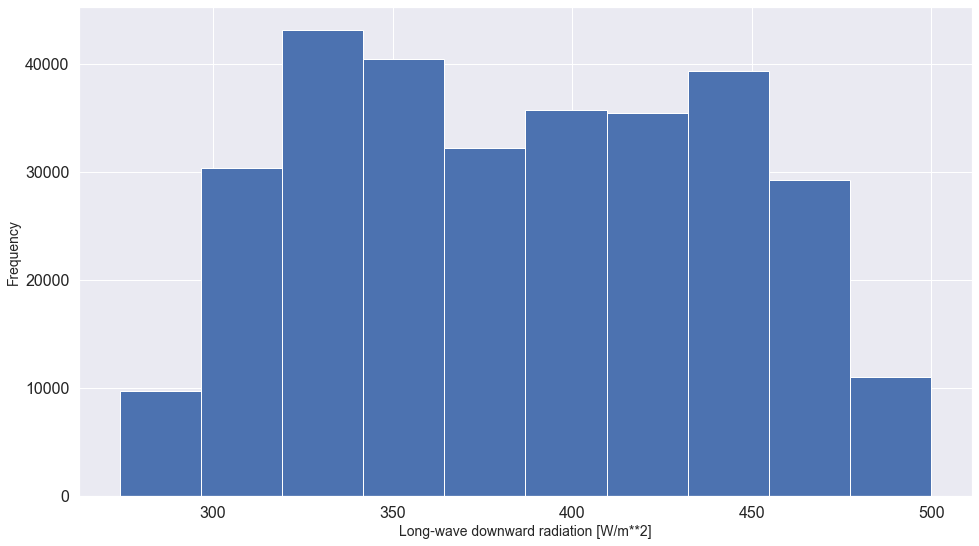

In [116]:
plt.figure(figsize=(16, 9))
basic_radiation['Long-wave downward radiation [W/m**2]'].plot(kind='hist', fontsize=16)
plt.xlabel('Long-wave downward radiation [W/m**2]', fontsize=14)
plt.ylabel('Frequency', fontsize=14);
#plt.figure(figsize=(16, 6))

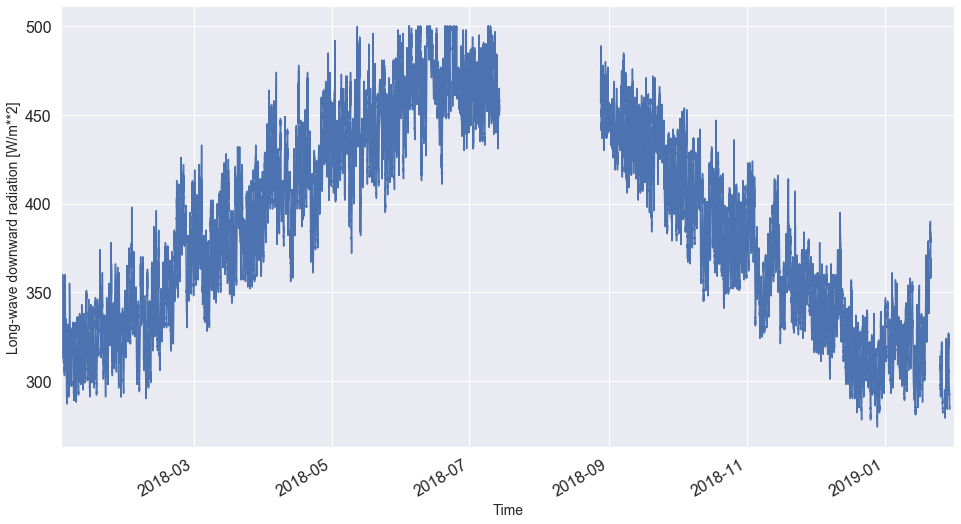

In [117]:
plt.figure(figsize=(16, 9))
sns.set()
basic_radiation['Long-wave downward radiation [W/m**2]'].plot(kind='line', fontsize=16,)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Long-wave downward radiation [W/m**2]', fontsize=14);

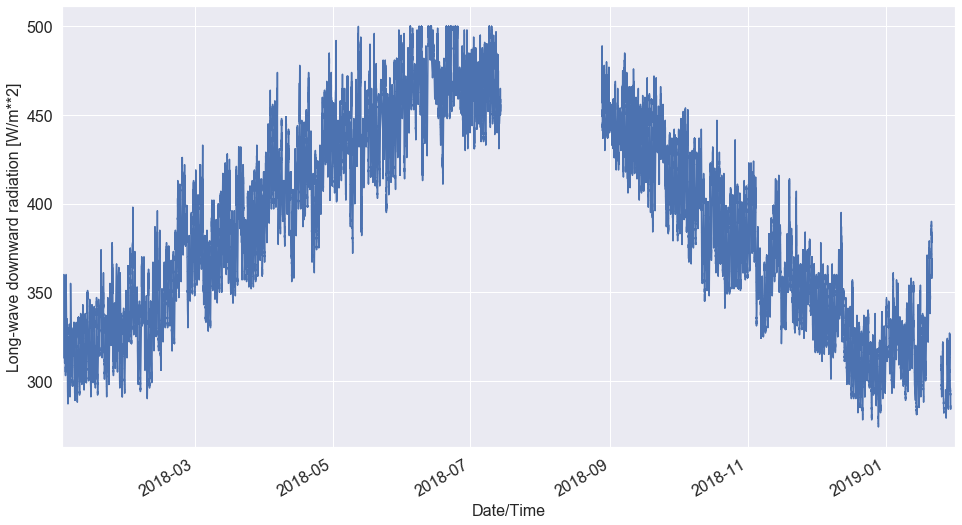

In [118]:
ax = basic_radiation['Long-wave downward radiation [W/m**2]'].plot(figsize=(16,9), fontsize=16,)

ax.set_ylabel('Long-wave downward radiation [W/m**2]', fontsize=16)
ax.set_xlabel('Date/Time', fontsize=16);

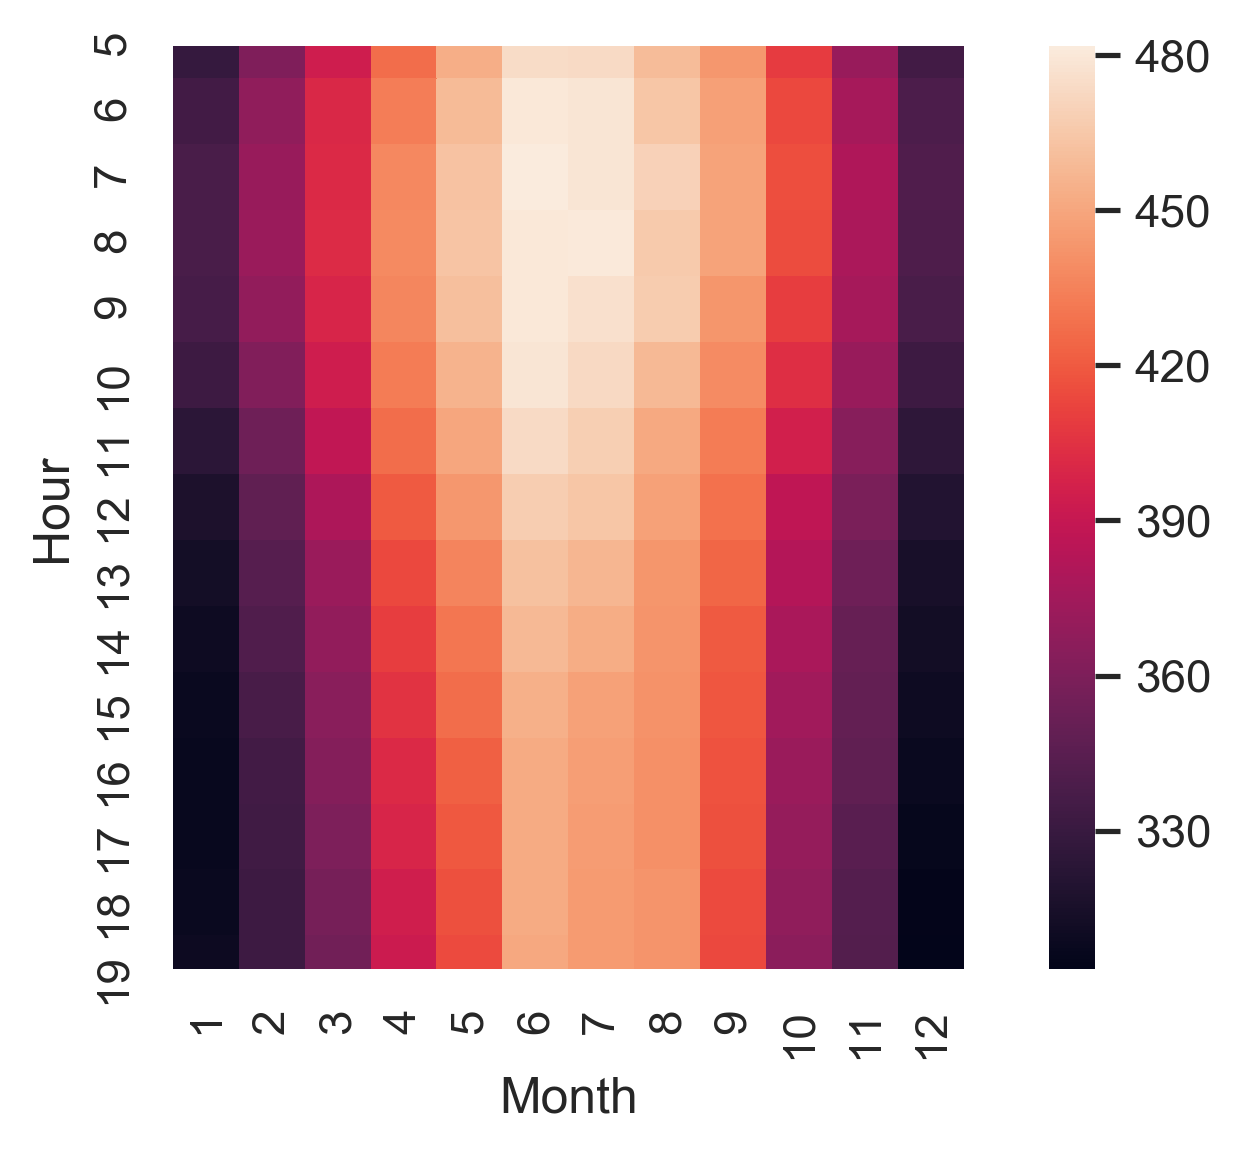

In [119]:
# plot pivot table as heatmap using seaborn
piv = pd.pivot_table(basic_radiation, values="Long-wave downward radiation [W/m**2]", index=[
                     "Hour"], columns=["Month"], fill_value=0)
plt.figure(dpi=300)
#sns.set_style("white")
#sns.set()
ax = sns.heatmap(piv, square=True, linewidths=0)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
#plt.title('Hour vs month')
plt.tight_layout()
plt.show()


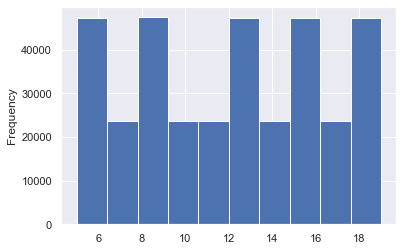

In [120]:
basic_radiation['Hour'].plot(kind='hist')

In [121]:
basic_radiation.query("(7< `Hour`< 19) & (`Year`<2017)")

Empty DataFrame
Columns: [Latitude, Longitude, Short-wave downward (GLOBAL) radiation [W/m**2], Direct radiation [W/m**2], Diffuse radiation [W/m**2], Long-wave downward radiation [W/m**2], Air temperature [deg C], Humidity, relative [%], Station pressure [hPa], Hour, Month, Day, Year]
Index: []

In [123]:
basic_radiation.groupby('Hour').agg({'Long-wave downward radiation [W/m**2]':np.mean})

Long-wave downward radiation [W/m**2]
Hour                                       
5                                398.046788
6                                403.138340
7                                405.021535
8                                404.757356
9                                402.481408
10                               397.819815
11                               391.725124
12                               384.832141
13                               379.371948
14                               375.783432
15                               372.941578
16                               370.726909
17                               369.690734
18                               368.141471
19                               367.262312

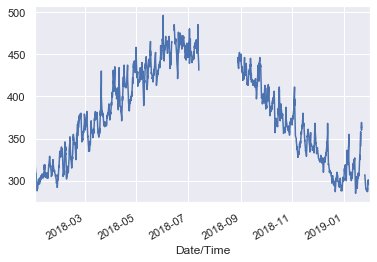

In [124]:
basic_radiation.query("`Hour`==14")['Long-wave downward radiation [W/m**2]'].plot()